<a href="https://colab.research.google.com/github/AnnaKul5/Computer-vision-basics/blob/main/ComputerVisionLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import  cv2
import matplotlib.pyplot as plt

def show_image(image):
    image_to_show = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_to_show)
    plt.show()

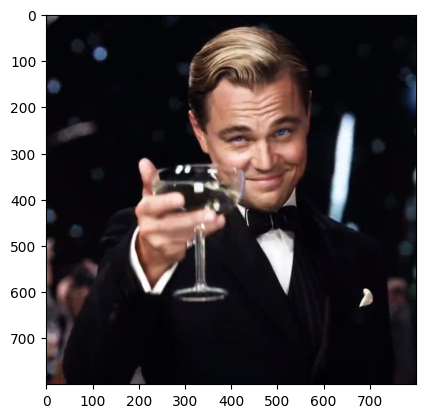

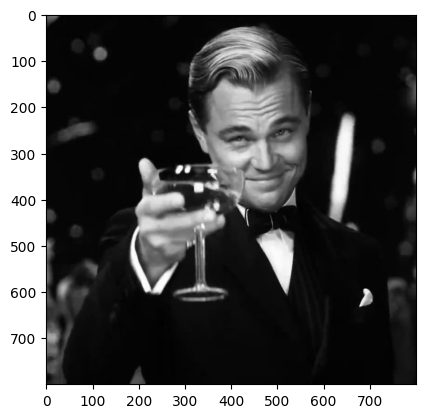

In [ ]:
img = cv2.imread ('/content/2f708e3bbef8d2ceda7b609e6c4dfa67.jpg')
show_image(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image(gray)

# 1. Найти лицо на изображении

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# 2. Отступить на 10% и получить фрагмент

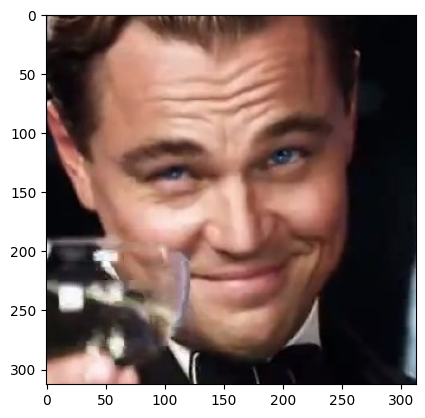

In [ ]:
if len(faces) > 0:
    (x, y, w, h) = faces[0]

    # Вычисление отступа
    offset_x = int(w * 0.1)
    offset_y = int(h * 0.1)

    # Получение фрагмента изображения с отступом
    face_with_offset = img[y - offset_y : y + h+offset_y, x - offset_x : x + w+offset_x]
    gray_face = cv2.cvtColor(face_with_offset, cv2.COLOR_BGR2GRAY)

    show_image(face_with_offset)

else:
    print("Лиц на изображении не найдено.")

# 3. Получить изображение краёв (границ объекта)

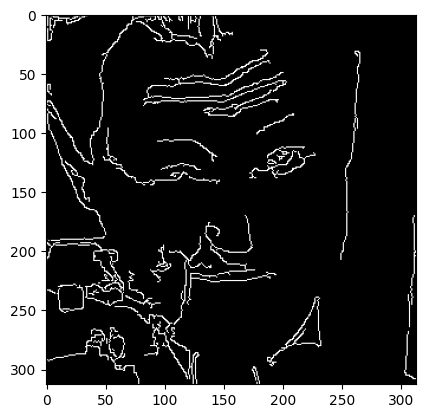

In [ ]:
face_Canny = cv2.Canny(face_with_offset, 25, 255, L2gradient = False)
show_image(face_Canny)

# 4. Найти и добавить угловые точки

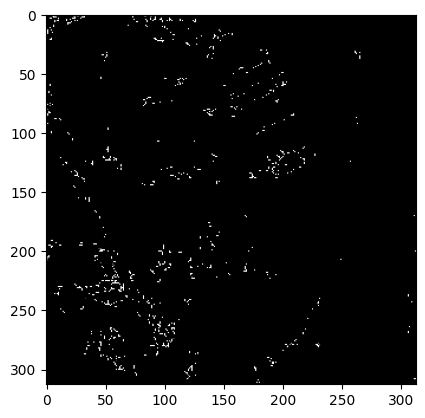

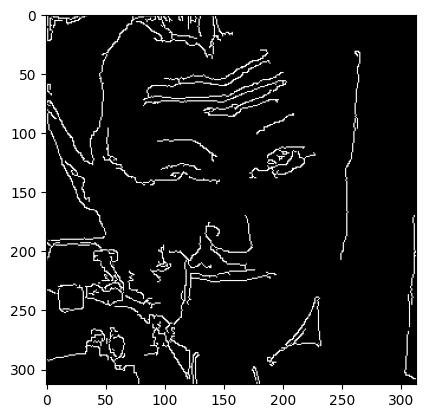

In [ ]:
gray_face_32 = np.float32(gray_face)
dest = cv2.cornerHarris(gray_face_32, 2, 5, 0.07)

# Нахождение угловых точек на исходном изображении
gray_face[dest < 0.01 * dest.max()] = 0
show_image(gray_face)

# Добавление угловых точек в изображение границ
gray_face += face_Canny
show_image(gray_face)

# 5. Применить морфологическую операцию наращивания

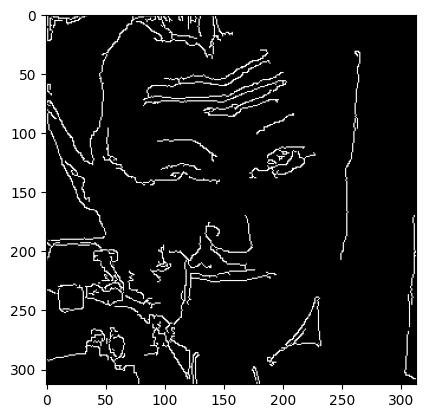

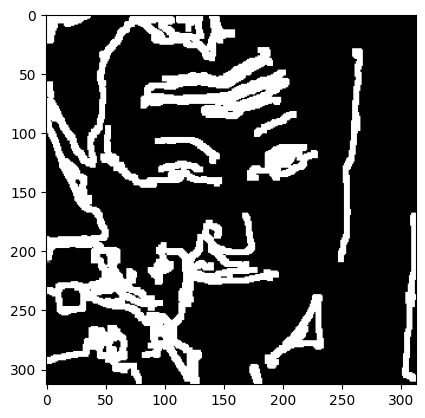

In [ ]:
# Создание структурирующего элемента размером 5x5
# Прямоугольное ядро
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Применение морфологической операции наращивания
dilated_face = cv2.dilate(gray_face, structuring_element)

show_image(gray_face)
show_image(dilated_face)

# 6. Сгладить изображение Гауссовским фильтром 5x5

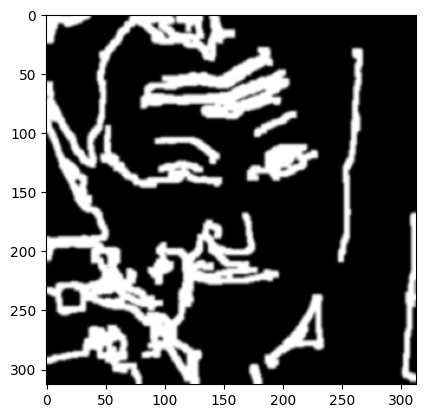

In [ ]:
smoothed_face = cv2.GaussianBlur(dilated_face, (5, 5), 0)

show_image(smoothed_face)

# 7. Получить нормализованное изображение

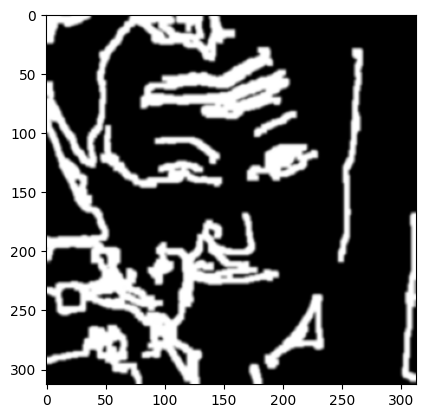

In [ ]:
M = smoothed_face.astype(np.float32) / 255.0

show_image(M)

#  8. Сгладить изображение лица Гауссовским фильтром 7x7

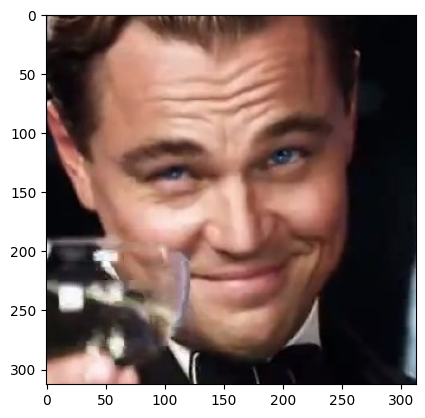

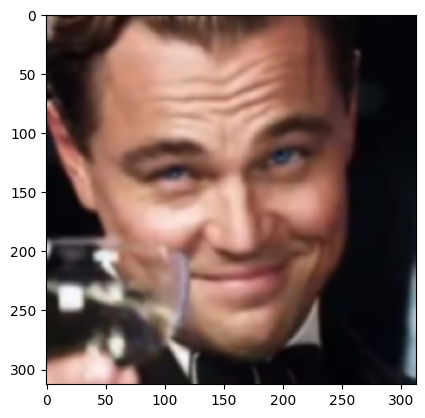

In [ ]:
F1 = cv2.GaussianBlur(face_with_offset, (7,7), 0)

show_image(face_with_offset)
show_image(F1)

# 9. Перевести изображение лица в пространство HSV и увеличить насыщенность цвета

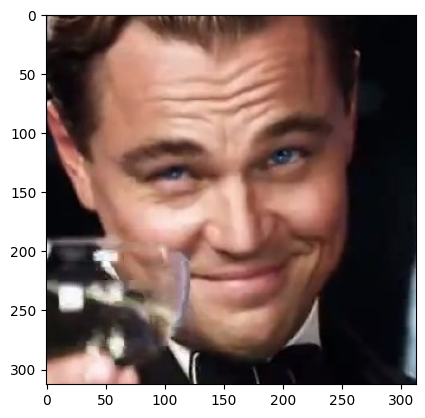

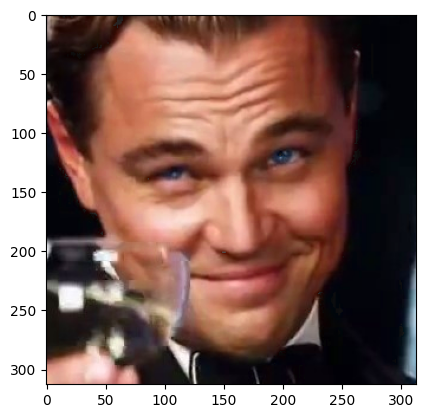

In [ ]:
# Перевод изображения лица в пространство HSV
face_hsv = cv2.cvtColor(face_with_offset, cv2.COLOR_BGR2HSV)

# Увеличение насыщенности в 1.3 раз
for x in range(0, len(face_hsv)):
    for y in range(0, len(face_hsv[0])):
      face_hsv[x, y, 1] = face_hsv[x, y, 1] * 1.3

# Преобразование обратно в пространство цветов BGR
F2 = cv2.cvtColor(face_hsv, cv2.COLOR_HSV2BGR)

show_image(face_with_offset)
show_image(F2)

# 10. Улучшить чёткость изображения

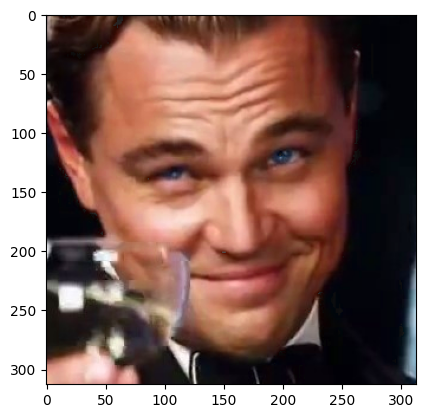

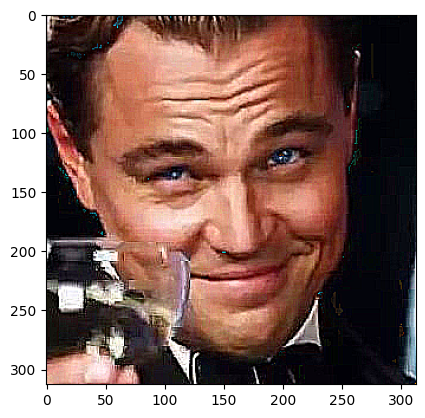

In [ ]:
show_image(F2)

kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
F2 = cv2.filter2D(F2, ddepth = -1, kernel = kernel)

show_image(F2)

# 11. Осуществить финальную фильтрацию

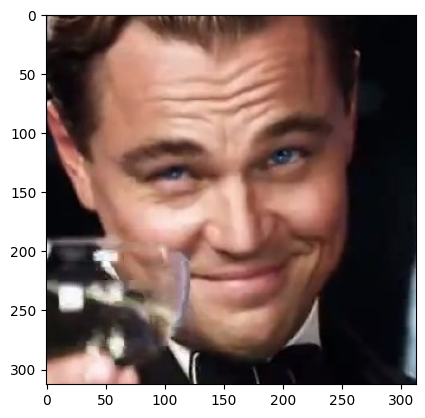

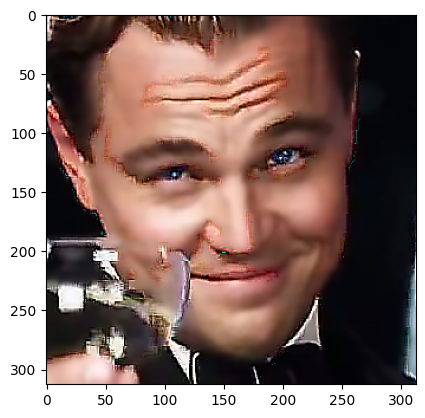

In [ ]:
x, y, c = face_with_offset.shape
result_img = np.empty((x, y, c), np.float32)

for i in range(x):
    for j in range(y):
      for k in range(c):
        result_img[i][j][k] = M[i][j] * F2[i][j][k] + (1 - M[i][j]) * F1[i][j][k]

result_img = np.uint8(result_img)

show_image(face_with_offset)
show_image(result_img)